In [54]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

## This line uses SciencePlots to make pretty plots. Use "pip install SciencePlots" to install
plt.style.use(["science", "nature", "bright", "grid"])
## Otherwise, just comment out to plot like normal

plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 11
plt.rcParams['legend.title_fontsize'] = 'x-small'

timestr = datetime.now().strftime("%Y%m%d-%H%M%S")


In [55]:
## Constants
hc = 1240 # eV nm

## Input parameters
gd = 1200 # Grating groove density; l/mm
mono_angle = 7 # Monochromator angle; deg
grating_to_collimator = 75 # Distance from grating to collimating mirror; cm
m = 1 # Diffraction order
focal_spot_size = 35 # Focal spot size at the output of the monochromator; um

##  Simulation parameters
# min_wl = 100 # Minimum wavelength; nm
# max_wl = 250 # Maximum wavelength; nm
# wl_steps = 256 # Number of steps to simulate #TODO: This might be deprecated
d = 1e6 / gd # Grating pitch; nm
samples = 2048 # Number of angle samples. Lots of non-physical answers are thrown out, so want >512
alphas = np.linspace(-np.pi, np.pi, samples) # Angles of incidence to scan; rad
betas = alphas - np.radians(mono_angle) # Diffracted angles; rad

In [56]:
## Calculations
# Grating equation:
#       E = [sin(a) + sin(b)]^-1 * (m hc / d)
# We're constrained such that a - b = mono_angle, so
#       E = [sin(b + mono_angle) + sin(b)]^-1 * (m hc / d)

# First, generate photon energy as a function of diffraction angle
# E(b)
eVs = (m * hc / d) / (np.sin(alphas) + np.sin(betas))

# Filter out non-physical answers
c1 = np.logical_and(np.degrees(betas) > -90, np.degrees(betas) < 90)
c2 = np.logical_and(eVs > 0, eVs < 100)
physical_values = np.logical_and(c1, c2)

eVs = eVs[physical_values]
alphas = alphas[physical_values]
betas = betas[physical_values]

# Take the derivative to get the angular dispersion
# dE / db
dE_db = np.gradient(eVs, betas)

# Convert angular dispersion to linear dispersion using small angle approximation
# dE / dl ≈ dE / db * 1/r, where r is the distance from grating to the collimating mirror
dE_dl = dE_db / (grating_to_collimator*1e-2)

# Convert linear dispersion to spectral resolution using the point-spread function
# ΔE = (dE / dl) * Δl where Δl is the point-spread function (focal spot size)
DE = dE_dl * (focal_spot_size * 1e-6)


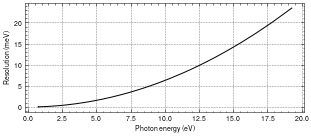

In [57]:
## Plots
plt.figure(figsize=(5,2))

plt.plot(eVs[eVs < 20], np.abs(DE[eVs < 20]) * 1e3, color="k")

plt.xlabel("Photon energy (eV)")
plt.ylabel("Resolution (meV)")

plt.savefig("figure.jpg", dpi=300)

plt.show()
